# Le modèle de ségrégation de Schelling

_ARE DYNAMIC - C. Cambier, P. Fournier, A. Guillon, J.-D. Kant, N. Maudet, S. Stinckwich_

En Décembre 2016 disparaissait Thomas C. Schelling. Economiste, récipiendaire du Prix de la Banque de Suède en sciences économiques en mémoire d’Alfred Nobel (communément appelé et considéré comme le prix Nobel d’économie), il a travaillé sur de nombreux sujets, en particulier l’analyse des conflits.

Une de ses contributions a permis de mieux comprendre les phénomènes de ségrégation. Plus précisément, le propos de Schelling fut d’étudier la dynamique par laquelle des phénomènes de ségrégation extrêmes peuvent survenir, en dépit de préférences qui peuvent sembler faiblement discriminantes individuellement. Ainsi, même si chaque individu se déclare prêt à accepter une certaine proportion d’invidus « différents » dans son voisinage, le résultat final peut être que la population se regroupe en régions très homogènes.

![Thomas C. Schelling](http://www.nobelprize.org/nobel_prizes/economic-sciences/laureates/2005/schelling_postcard.jpg)

Cette étude peut être menée à l’aide de modèles connus sous le nom d’automates cellulaires. Un des automates les plus célèbres est le [jeu de la vie](https://fr.wikipedia.org/wiki/Jeu_de_la_vie), proposé par John Conway en 1970. Il existe de nombreux autres automates cellulaires dont le comportement est relativement bien étudié, et la littérature est riche à ce sujet. Nous recommandons la lecture de l’article [2] de Jean-Paul Delahaye.

## Modèle linéaire

Pour illustrer le modèle, prenons un monde _linéaire_ (c’est en fait le premier modèle étudié par Schelling dans son article, à quelques détails près). Le modèle se compose des éléments suivants :

- les individus sont de deux _types_ (« 0 » et « 1 »), disposés spatialement sur une ligne.
- le _voisinage_ sont les quatre voisins d’une cellule, de chaque côté. Il faut noter que le nombre de voisins peut varier selon la localisation (pour les individus en bout de ligne).
- le _seuil de satisfaction_ : un individu est satisfait si une majorité (faible) de ses voisins est de la même couleur que lui (i.e. il veut au moins autant de voisins de même type que lui que de voisins différents)
- le mode de déplacement : un individu non satisfait va chercher à se déplacer pour trouver un emplacement qui le satisfasse. La règle dans ce cas là est qu’un individu se déplace vers l’emplacement le plus proche qui le satisfait.
- la dynamique des déplacements est simplement de considérer les individus, de gauche à droite. Chaque individu non satisfait se déplace (vers la gauche ou vers la droite) vers la l’emplacement le plus proche qui le satisfait. Il s’insère alors à la localisation visée. Un tour est terminé lorsque tous les agents ont été considérés.

Partant d’un état initial, le processus est répété jusqu’à équilibre, c’est-à-dire jusqu’à ce que plus aucun individu insatisfait ne puisse se déplacer, ou qu’une situation de blocage soit détectée. Cela peut nécessiter plusieurs tours.

Pour illustrer le propos, considérons la situation initiale suivante :

![Linear Model 1](linearmodel1.png)
Les individus non satisfaits sont indiqués en gris dans la table. Le premier individu à se déplacer sera donc le deuxième en partant de la gauche. En effet, son voisinage ne comprend qu’un autre individu 1 (sur 5). Pour trouver une place satisfaisante, il va devoir se déplacer de 6 cases vers la droite. Le nouvel état sera alors (l’individu s’étant déplacé est en gras) :

![Linear Model 2](linearmodel2.png)

L’impact de plusieurs paramètres du modèle peut être étudié : (i) le voisinage, (ii) les préférences des individus (le seuil de voisins de leur couleur qui les satisfait), (iii) le ratio entre les deux types d’individus, (iv) la configuration initiale, et (v) les règles de mouvement.

Les métriques qu’il peut être intéressant d’étudier sont, par exemple, (i) le nombre d’individus satisfaits à l’équilibre, (ii) la taille (moyenne) des regroupements homogènes observés et leur nombre, (iii) la moyenne sur tous les individus de voisins du même type qu’eux, ou encore (iv) le nombre de tours nc ́essaires pour arriver à un état stable.

## Modèle spatial

L’extension à un modèle spatial n’est pas complètement triviale. En effet, si toutes les localisations sont occupées, il n’est pas si évident de définir les règles de déplacements (où se déplacent les individus « chassés » de leur localisation ?). Il est alors plus aisé d’introduire alors des localisations non occupées. Dans ce cas, les individus se déplacent vers la localisation inoccupée la plus proche (selon la [distance de Manhattan](https://fr.wikipedia.org/wiki/Distance_de_Manhattan), par exemple), qui satisfait leur seuil de préférence. Une autre solution serait de les faire se déplacer simplement au hasard vers une localisation inoccupée qui les satisfait.

## Travail demandé

Dans le cadre de cet ARE, il vous est demandé :

1. en vous appuyant sur le code qui vous est fourni, de comprendre et d’étudier le modèle linéaire Schelling, et d’essayer de reproduire le plus fidèlement possible les résultats originaux [1];
2. d’analyser le comportement de ce modèle en faisant varier certains paramètres. Pour cela, vous devrez compléter le code afin de pouvoir lancer des simulations (permettant de faire varier automatiquement certaines valeurs de paramètres), et d’afficher des courbes pour visualiser les résultats moyennés sur un nombre suffisant de simulations ;
3. de proposer une version _animée_ du modèle spatial. Vous pourrez vous contenter d’un modèle simple de déplacement aléatoire.

## Références
- [1] Thomas C. Schelling, [Dynamic Models of Segregation](http://www.stat.berkeley.edu/~aldous/157/Papers/Schelling_Seg_Models.pdf), Journal of Mathematical Sociology (1971) 143-186
- [2] J.-P. Delahaye, [Le royaume du jeu de la vie](http://www.lifl.fr/~jdelahay/dnalor/Jeudelavie.pdf), Pour la Science (2009) 378

## Solution pour modèle linéaire

In [4]:
import numpy as np
import random
import copy

from matplotlib import pyplot as plt

# GLOBAL PARAMETERS FOR EXPERIMENTS
neighb = 4          # size of neighbourhood
threshold = 0.5     # threshold of satisfaction
maxIterations = 5   # max number of iteration for convergence
size = 22           # size of the line

Un état de l'automate cellulaire est représenté sous la forme d'une liste de 0 et de 1. Par exemple:

In [5]:
cells = [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1]

La fonction ```str_state``` convertit un automate cellulaire en une chaîne de caractères pour l'afficher à l'écran.

In [6]:
def str_state(state):
    '''
    return the state as a string
    '''
    result = ""
    for i in state:
        result += str(i)
    return result

In [7]:
str_state(cells)

'0100011010011100111101'

La fonction ```hogeneinity_level``` calcule pour l'individu à la position c, le ratio d'individus du même type.

In [8]:
def homogeneinity_level(position, state):
    '''
    for a given individual at position and state
    returns the ratio of individuals of same type in neighbourhood
    '''
    my_color = state[position]
    count = 0
    nb_neighb = 0
    for i in range(1, neighb+1):
        if position+i < len(state):
            nb_neighb += 1
            if state[position+i] == my_color:
                count += 1
        if position-i >= 0:
            nb_neighb += 1
            if state[position-i] == my_color:
                count += 1
    return float(count / nb_neighb)

In [9]:
homogeneinity_level(1,cells)

0.2

In [10]:
def is_happy(position, state, verbose = False):
    '''
    returns whether individual at position is satisfied in a given state
    '''
    h = homogeneinity_level(position, state)
    if verbose:
        print(h)
    return h >= threshold

In [11]:
is_happy(1, cells)

False

Il est également possible d'afficher sous forme de chaine de caractère quels individus sont insatisfaits (notés 'X'). 

In [12]:
def str_unhappy(string):
    '''
    returns the string marking unhappy individuals with a 'X'
    '''
    result = ""
    for i in range(len(string)):
        if is_happy(i, string):
            result += " "
        else:
            result += "X"
    return result

In [13]:
print(str_state(cells))
print(str_unhappy(str_state(cells)))

0100011010011100111101
 X   XX  XXX  XX    X 


La fonction ```move_to``` déplace un individu vers une nouvelle position à droite ou à gauche. La priorité est donnée au déplacement à droite.

In [14]:
def move_to(c, p, s):
    '''
    c position initiale
    p position où l'on déplace l'agent
    moves individual c to position p, shifting other individuals
    s state
    and returns the resulting list
    '''
    new_s = copy.copy(s) # new list for result
    my_color = new_s[c]
    # gives priority to the right move in case of ties
    # I didn't find this specification in Schelling's paper
    if p > c: # moving to the right
        for i in range(c, p):
            new_s[i] = s[i+1]
    else:   # moving to the left

        for i in range(p, c):
            new_s[i+1] = s[i]
    new_s[p] = my_color
    return new_s

In [15]:
new_cells = move_to(1, 7, cells)
print("Avant le déplacement:", str_state(cells))
print("Après le déplacement:", str_state(new_cells))

Avant le déplacement: 0100011010011100111101
Après le déplacement: 0000110110011100111101


In [16]:
def move_to_nearest_satisfying(c,s,verbose=False):
    '''
    will move individual c to nearest satisfying location
    simulate the move and check whether satisfying
    returns a tuple new state, and boolean satisfied
    note: very inefficient but simple solution
    '''

    move_limit = max(size-c, c)
    move_distance = 0
    new_s = []
    satisfied = False
    while move_distance < move_limit and not(satisfied):
        move_distance += 1
        new_s = copy.copy(s) # used to simulate the move
        if c+move_distance < size:
            new_s = move_to(c, c+move_distance, new_s)
            satisfied = is_happy(c+move_distance, new_s)
        if c-move_distance >= 0 and not satisfied: # trying to move left
            new_s = copy.copy(s)
            new_s = move_to(c, c-move_distance, new_s)
            satisfied = is_happy(c-move_distance, new_s)
        if verbose and satisfied:
            print (c, " moved to:", c-move_distance)
    return new_s, satisfied

In [17]:
print ("Avant le déplacement:", str_state(cells))
new_cells, sat = move_to_nearest_satisfying(1, cells,True)
print ("Après le déplacement:", str_state(new_cells))

Avant le déplacement: 0100011010011100111101
1  moved to: -5
Après le déplacement: 0000110110011100111101


### Dynamique

La dynamique consiste ensuite à répéter les déplacements. Schelling suggère de considérer les individus un par un, en partant de la gauche, et de les faire se déplacer s'ils le peuvent. Un *tour* est terminé lorsque tous les individus ont été considérés, et on peut répéter ainsi les tours. Mais quand s'arrêter avec cette dynamique? 

On pourrait penser différents critères de convergence dans notre cas:
* lorsque tous les individus sont satisfaits. Malheureusement, rien ne garantit que le système puisse parvenir à un état où tous les individus sont satisfaits (cela peut arriver mais c'est plutôt exceptionnel). 
* lorsque plus aucun individu ne peut se déplacer. Ce critère est plus pertinent, mais il cache une difficulté: le système ne parvient pas non plus nécessairement dans un état où plus aucun individus ne peut se déplacer. Ce critère seul peut donc mener à des boucles infinies. 
* nous emploierons donc un garde-fou, qui consistera à poser un nombre maximal d'itérations. Si le système n'est pas stabilisé selon le critère précédent après ce nombre d'itérations, la dynamique s'arrête. 

In [18]:
###############################################################################
# GLOBAL DYNAMICS
###############################################################################
# Note: departs a little bit from Schelling's specification here
# Interesting problem of non convergence here when no maxIterations condition
# the penultimate individual moves to the last position, and so on


def dynamics(state, verbose = False, stepwise = False):
    '''
    departs a little bit from Schelling's specification here
    '''
    one_has_moved = True
    iterations = 0
    while one_has_moved and iterations < maxIterations:
        one_has_moved = False
        for i in range(len(state)):
            if not (is_happy(i, state)): # i wants to move
                state, moved = move_to_nearest_satisfying(i, state, False)
                one_has_moved = moved or one_has_moved
        if verbose:
            print ("Tour :", iterations)
            print(str_state(state))
            print(str_unhappy(state))
            #print(count_unhappy(state))
        if stepwise:
            input("Press Enter to continue...")
        iterations += 1
    return state

In [19]:
new_cells = dynamics(cells,True)

Tour : 0
0000100000011111111111
    X                 
Tour : 1
0000000000111111111111
                      
Tour : 2
0000000000111111111111
                      


Pour cet état initial on a donc une convergence directe. La dynamique s'arrête au tour 2 car plus aucun individu ne souhaite se déplacer. Mais considérons un autre état initial:

In [20]:
cells2 = [1,1,1,1,0,0,0]
new_cells2 = dynamics (cells2,True)

Tour : 0
1111000
    XX 
Tour : 1
1111000
    XX 
Tour : 2
1111000
    XX 
Tour : 3
1111000
    XX 
Tour : 4
1111000
    XX 


Cette fois la dynamique s'arrête grâce à la limite sur le nombre d'itérations. Comprenez-vous pourquoi? 

Calculons le nombre moyen de satisfaction pour un automate cellulaire :

In [46]:
# Average level of satisfaction
cells = np.random.randint(0, 2, (10))
def average_homogeneity(cells):
    avr = 0
    for i in range(len(cells)):
        avr = avr + homogeneinity_level(i, cells)
    return avr/len(cells)

In [47]:
average_homogeneity(cells)

0.4557142857142857

In [87]:
def average_cluster_size(cells):
    result = []
    color = cells[0]
    s = 0
    for i in range(len(cells)):
        if color == cells[i]:
            s = s + 1
        else:
            result.append(s)
            color = cells[i]
            s = 1
    result.append(s)
    avr = 0.0
    for j in result:
        avr = avr + j
    return avr/len(result)

In [88]:
average_cluster_size(cells2)

3.5

Faisons varier le taux (threshold) de 0 à 1.0 par pas de 0.1 pour étudier la variation de ce paramètre par rapport aux taux global de satisfaction (average_homogeneity). Pour chaque pas, on fait plusieurs simulations (nb_simulations) afin d'avoir des résultats en moyenne. Enfin, on effectue un graphe montrant l'évolution du taux global de satisfaction.

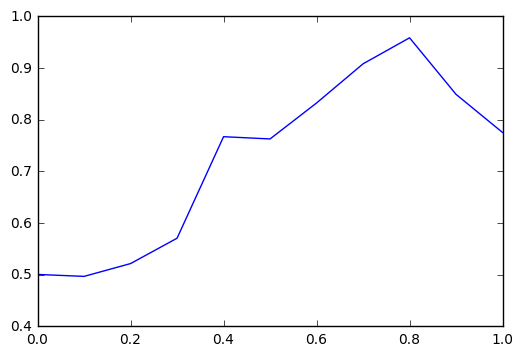

In [94]:
jump = 0.1
t = 0.0
tend = 1.0
result = []
nb_simulations = 20
size = 100
while t < tend:
    avr = 0.0
    threshold = t
    for i in range(nb_simulations):
        state = np.random.randint(0, 2, (size))
        avr = avr + average_homogeneity(dynamics(state))
    result.append(avr/nb_simulations)
    t += jump
x = np.linspace(0.0, 1.0, (1.0/jump)+1)

plt.plot(x, result)
plt.show()